(IN)=

# 1.7 Integración Numérica

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de la [liga1](https://www.dropbox.com/s/jfrxanjls8kndjp/Diferenciacion_e_Integracion.pdf?dl=0) y [liga2](https://www.dropbox.com/s/k3y7h9yn5d3yf3t/Integracion_por_Monte_Carlo.pdf?dl=0).

```{admonition} Comentario

Los métodos revisados en esta nota de integración numérica serán utilizados más adelante para revisión de herramientas en Python para **perfilamiento de código: uso de cpu y memoria**. También serán referidos en el capítulo de **cómputo en paralelo**.
```

En lo siguiente consideramos que las funciones del integrando están en $\mathcal{C}^2$ en el conjunto de integración (ver {ref}`Definición de función, continuidad y derivada <FCD>` para definición de $\mathcal{C}^2$).

Las reglas o métodos por cuadratura nos ayudan a aproximar integrales con sumas de la forma:

$$\displaystyle \int_a^bf(x)dx \approx \displaystyle \sum_{i=0}^nw_if(x_i)$$

donde: $w_i$ es el **peso** para el **nodo** $x_i$, $f$ se llama integrando y $[a,b]$ intervalo de integración. Los valores $f(x_i)$ se asumen conocidos.

Todas las reglas o métodos por cuadratura se obtienen con interpoladores polinomiales del integrando (por ejemplo usando la representación de Lagrange) o también con el teorema Taylor (ver nota {ref}`Polinomios de Taylor y diferenciación numérica <PTDN>` para éste teorema).

Se realizan aproximaciones numéricas por:
* Desconocimiento de la función en todo el intervalo $[a,b]$ y sólo se conoce en los nodos su valor.
* Inexistencia de antiderivada o primitiva del integrando. Por ejemplo: 

$$\displaystyle \int_a^be^{-\frac{x^2}{2}}dx$$ con $a,b$ números reales.

```{admonition} Observación
:class: tip

Si existe antiderivada o primitiva del integrando puede usarse el cómputo simbólico o algebraico para obtener el resultado de la integral y evaluarse. Un paquete de Python que nos ayuda a lo anterior es [SymPy](https://www.sympy.org/en/index.html).
```

Dependiendo de la ubicación de los nodos y pesos es el método de cuadratura que resulta:

* Newton-Cotes si los nodos y pesos son equidistantes como la regla del rectángulo, trapecio y Simpson (con el teorema de Taylor o interpolación es posible obtener tales fórmulas).
* Cuadratura Gaussiana si se desea obtener reglas o fórmulas que tengan la mayor exactitud posible. Ejemplos de este tipo de cuadratura se tiene la regla por cuadratura Gauss-Legendre en [-1,1] o Gauss-Hermite para el caso de integrales en $[-\infty, \infty]$ con integrando $e^{-x^2}f(x)$.

```{admonition} Comentario

Los métodos de integración numérica por Newton-Cotes o cuadratura Gaussiana pueden extenderse a más dimensiones, sin embargo incurren en lo que se conoce como la **maldición de la dimensionalidad** que para el caso de integración numérica consiste en la gran cantidad de evaluaciones que deben realizarse de la función del integrando para tener una exactitud pequeña. Por ejemplo con un número de nodos igual a $10^4$, una distancia entre ellos de $.1$ y una integral en $4$ dimensiones para la regla por Newton Cotes del rectángulo, se obtiene una exactitud de $2$ dígitos. Como alternativa a los métodos por cuadratura anteriores para las integrales de más dimensiones se tienen los {ref}`métodos de integración por el método Monte Carlo <IMC>` que generan aproximaciones con una exactitud moderada (del orden de $\mathcal{O}(n^{-1/2})$ con $n$ número de nodos) para un número de puntos moderado **independiente** de la dimensión.
```

## Newton-Cotes

Si el conjunto de nodos $x_i, i=0,1,\dots,n$ cumple $x_{i+1}-x_i=h, \forall i=0,1,\dots,n-1$ con $h$ (espaciado) constante y se aproxima la función del integrando $f$ con un polinomio en $(x_i,f(x_i)) \forall i=0,1,\dots,n$ entonces se tiene un método de integración numérica por Newton-Cotes (o reglas o fórmulas por Newton-Cotes).

```{margin}

En este dibujo se muestra que puede subdivirse el intervalo de integración en una mayor cantidad de subintervalos, lo cual para la función $f$ mostrada es benéfico pues se tiene mejor aproximación (¿en la práctica esto será bueno? recuérdese los errores de redondeo de la nota {ref}`Sistema de punto flotante <SPF>`). 

```

<img src="https://dl.dropboxusercontent.com/s/baf7eauuwm347zk/integracion_numerica.png?dl=0" heigth="500" width="500">

En el dibujo: a),b) y c) se integra numéricamente por Newton-Cotes. d) es por cuadratura Gaussiana.


```{admonition} Observación
:class: tip

Si la fórmula por Newton-Cotes involucra el valor de la función en los extremos se nombra cerrada, si no los involucra se les nombra abiertas. En el dibujo d) es abierta.
```

```{admonition} Definición

Los métodos que utilizan la idea anterior de dividir en subintervalos se les conoce como **métodos de integración numérica compuestos** en contraste con los simples:

Para las reglas compuestas se divide el intervalo $[a,b]$ en $n$ subinteralos $[a_{i-1},a_i], i=1,\dots,n$ con $a_0=a<a_1<\dots<a_{n-1}<a_n=b$ y se considera una partición regular, esto es: $a_i-a_{i-1}=\hat{h}$ con $\hat{h}=\frac{h}{n}$ y $h=b-a$. En este contexto se realiza la aproximación:

$$\displaystyle \int_a^bf(x)dx = \sum_{i=1}^n\int_{a_{i-1}}^{a_i}f(x)dx.$$
```

## Ejemplo de una integral que no tiene antiderivada

En las siguientes reglas se considerará la función $f(x)=e^{-x^2}$ la cual tiene una forma:

In [1]:
import math

import numpy as np
import pandas as pd
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
f=lambda x: np.exp(-x**2)

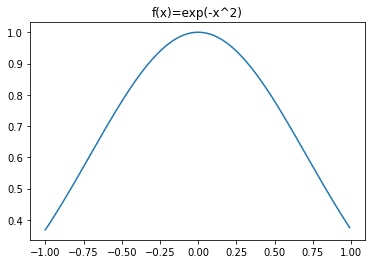

In [3]:
x=np.arange(-1,1,.01)
plt.plot(x,f(x))
plt.title('f(x)=exp(-x^2)')
plt.show()

El valor de la integral $\int_0^1e^{-x^2}dx$ es:

In [4]:
obj, err = quad(f, 0, 1)

In [5]:
(obj,err)

(0.7468241328124271, 8.291413475940725e-15)

```{admonition} Observación 
:class: tip 

El segundo valor regresado `err`, es una cota superior del error.
```

## Regla simple del rectángulo

Denotaremos a esta regla como $Rf$. En este caso se aproxima el integrando $f$ por un polinomio de grado **cero** con nodo en $x_1 = \frac{a+b}{2}$. Entonces: 

$$\displaystyle \int_a^bf(x)dx \approx \int_a^bf(x_1)dx = (b-a)f(x_1)=(b-a)f\left( \frac{a+b}{2} \right ) = hf(x_1)$$

con $h=b-a, x_1=\frac{a+b}{2}$.


<img src="https://dl.dropboxusercontent.com/s/mzlmnvgnltqamz3/rectangulo_simple.png?dl=0" heigth="200" width="200">


### Ejemplo de implementación de regla simple de rectángulo: usando math

Utilizar la regla simple del rectángulo para aproximar la integral $\displaystyle \int_0^1e^{-x^2}dx$.

In [6]:
f=lambda x: math.exp(-x**2) #using math library

In [7]:
def Rf(f,a,b):
    """
    Compute numerical approximation using simple rectangle or midpoint method in 
    an interval.
    """
    node=a+(b-a)/2.0 #mid point formula to minimize rounding errors
    return f(node) #zero degree polynomial

In [8]:
rf_simple = Rf(f,0,1)

In [9]:
rf_simple

0.7788007830714049

```{admonition} Observación
:class: tip

Para cualquier aproximación calculada siempre es una muy buena idea reportar el error relativo de la aproximación si tenemos el valor del objetivo. No olvidar esto :)

```

In [10]:
def compute_error(obj,approx):
    '''
    Relative or absolute error between obj and approx.
    '''
    if math.fabs(obj) > np.nextafter(0,1):
        Err = math.fabs(obj-approx)/math.fabs(obj)
    else:
        Err = math.fabs(obj-approx)
    return Err

In [11]:
compute_error(obj, rf_simple)

0.04281684114646715

**El error relativo es de $4.2\%$ aproximadamente.**

## Regla compuesta del rectángulo

En cada subintervalo construído como $[a_{i-1},a_i]$ con $i=1,\dots,n$ se aplica la regla simple $Rf$, esto es:

$$\displaystyle \int_{a_{i-1}}^{a_i}f(x)dx \approx R_i(f) \forall i=1,\dots,n.$$

De forma sencilla se puede ver que la regla compuesta del rectángulo $R_c(f)$ se escribe:

$$R_c(f) = \displaystyle \sum_{i=1}^n(a_i-a_{i-1})f\left( \frac{a_i+a_{i-1}}{2}\right) = \frac{h}{n}\sum_{i=1}^nf\left( \frac{a_i+a_{i-1}}{2}\right)$$

con $h=b-a$ y $n$ número de subintervalos.

<img src="https://dl.dropboxusercontent.com/s/j2wmiyoms7gxrzp/rectangulo_compuesto.png?dl=0" heigth="200" width="200">


```{admonition} Observación
:class: tip

Los nodos para el caso del rectángulo se obtienen con la fórmula: $x_i = a +(i+\frac{1}{2})\hat{h}, \forall i=0,\dots,n-1, \hat{h}=\frac{h}{n}$. Por ejemplo si $a=1, b=2$ y $\hat{h}=\frac{1}{4}$ (por tanto $n=4$ subintervalos) entonces:

Los subintervalos que tenemos son: $\left[1,\frac{5}{4}\right], \left[\frac{5}{4}, \frac{6}{4}\right], \left[\frac{6}{4}, \frac{7}{4}\right]$ y $\left[\frac{7}{4}, 2\right]$. 


Los nodos están dados por: 

$$x_0 = 1 + \left(0 + \frac{1}{2} \right)\frac{1}{4} = 1 + \frac{1}{8} = \frac{9}{8}$$

$$x_1 = 1 + \left(1 + \frac{1}{2}\right)\frac{1}{4} = 1 + \frac{3}{2}\cdot \frac{1}{4} = \frac{11}{8}$$

$$x_2 = 1 + \left(2 + \frac{1}{2}\right)\frac{1}{4} = 1 + \frac{5}{8}\cdot \frac{1}{4} = \frac{13}{8}$$

$$x_3 = 1 + \left(3 + \frac{1}{2}\right)\frac{1}{4} = 1 + \frac{7}{2}\cdot \frac{1}{4} = \frac{15}{8}$$
```

### Ejemplo de implementación de regla compuesta de rectángulo: usando math

Utilizar la regla compuesta del rectángulo para aproximar la integral $\int_0^1e^{-x^2}dx$.

In [12]:
f=lambda x: math.exp(-x**2) #using math library

In [13]:
def Rcf(f,a,b,n): #Rcf: rectángulo compuesto para f
    """
    Compute numerical approximation using rectangle or mid-point method in 
    an interval.
    Nodes are generated via formula: x_i = a+(i+1/2)h_hat for i=0,1,...,n-1 and h_hat=(b-a)/n
    Args:
        f (function): function expression of integrand
        a (float): left point of interval
        b (float): right point of interval
        n (float): number of subintervals
    Returns:
        sum_res (float): numerical approximation to integral of f in the interval a,b 
    """
    h_hat=(b-a)/n
    nodes=[a+(i+1/2)*h_hat for i in range(0,n)]
    sum_res=0
    for node in nodes:
        sum_res=sum_res+f(node)
    return h_hat*sum_res 

In [14]:
a = 0; b = 1

**1 nodo**

In [15]:
n = 1
rcf_1 = Rcf(f,a, b, n)
rcf_1

0.7788007830714049

**2 nodos**

In [16]:
n = 2
rcf_2 = Rcf(f,a, b, n)
rcf_2

0.7545979437721995

**$10^3$ nodos**

In [17]:
n = 10**3
rcf_3 = Rcf(f, a, b, n)
rcf_3

0.746824163469049

**Errores relativos:**

In [18]:
rel_err_rcf_1 = compute_error(obj, rcf_1)
rel_err_rcf_2 = compute_error(obj, rcf_2)
rel_err_rcf_3 = compute_error(obj, rcf_3)

In [19]:
dic = {"Aproximaciones Rcf": [
                              "Rcf_1",
                              "Rcf_2",
                              "Rcf_3"
                              ],
       "Número de nodos" : [
                            1,
                            2,
                            1e3
                            ],
       "Errores relativos": [
                             rel_err_rcf_1,
                             rel_err_rcf_2,
                             rel_err_rcf_3
                            ]
      }



In [20]:
pd.DataFrame(dic)

,Aproximaciones Rcf,Número de nodos,Errores relativos
0,Rcf_1,1.0,4.281684e-02
1,Rcf_2,2.0,1.040916e-02
2,Rcf_3,1000.0,4.104932e-08


### Comentario: [pytest](https://docs.pytest.org/en/latest/)

Otra forma de evaluar las aproximaciones realizadas es con módulos o paquetes de Python creados para este propósito en lugar de crear nuestras funciones como la de `compute_error`. Uno de estos es el paquete `pytest` y la función [approx](https://docs.pytest.org/en/latest/reference.html#pytest-approx) de este paquete:

In [21]:
from pytest import approx

In [22]:
rcf_1 == approx(obj)

False

In [23]:
rcf_2 == approx(obj)

False

In [24]:
rcf_3 == approx(obj)

True

Y podemos usar un valor definido de tolerancia definido para hacer la prueba (por default se tiene una tolerancia de $10^{-6}$): 

In [25]:
rcf_1 == approx(obj, abs=1e-1, rel=1e-1)

True

### Pregunta

**Será el método del rectángulo un método estable numéricamente bajo el redondeo?** Ver nota {ref}`Condición de un problema y estabilidad de un algoritmo <CPEA>` para definición de estabilidad numérica de un algoritmo.


Para responder la pregunta anterior aproximamos la integral con más nodos: $10^5$ nodos

In [26]:
n = 10**5
rcf_4 = Rcf(f, a, b, n)
rcf_4

0.7468241328154887

In [27]:
compute_error(obj, rcf_4)

4.099426997862257e-12

Al menos para este ejemplo con $10^5$ nodos parece ser **numéricamente estable...**

## Regla compuesta del trapecio

En cada subintervalo se aplica la regla simple $Tf$, esto es:

$$\displaystyle \int_{x_{i-1}}^{x_i}f(x)dx \approx T_i(f) \forall i=1,\dots,n.$$

Con $T_i(f) = \frac{(x_i-x_{i-1})}{2}(f(x_i)+f(x_{i-1}))$ para $i=1,\dots,n$.

De forma sencilla se puede ver que la regla compuesta del trapecio $T_c(f)$ se escribe como:

$$T_c(f) = \displaystyle \frac{h}{2n}\left[f(x_0)+f(x_n)+2\displaystyle\sum_{i=1}^{n-1}f(x_i)\right]$$

con $h=b-a$ y $n$ número de subintervalos.

<img src="https://dl.dropboxusercontent.com/s/4dl2btndrftdorp/trapecio_compuesto.png?dl=0" heigth="200" width="200">


```{admonition} Observación
:class: tip

Los nodos para el caso del trapecio se obtienen con la fórmula: $x_i = a +i\hat{h}, \forall i=0,\dots,n, \hat{h}=\frac{h}{n}$.
```

### Ejemplo de implementación de regla compuesta del trapecio: usando numpy

Con la regla compuesta del trapecio se aproximará la integral $\int_0^1e^{-x^2}dx$. Se calculará el error relativo y  graficará $n$ vs Error relativo para $n=1,10,100,1000,10000$.

In [28]:
f=lambda x: np.exp(-x**2) #using numpy library

In [29]:
def Tcf(n,f,a,b): #Tcf: trapecio compuesto para f
    """
    Compute numerical approximation using trapezoidal method in 
    an interval.
    Nodes are generated via formula: x_i = a+ih_hat for i=0,1,...,n and h_hat=(b-a)/n
    Args:
        f (function): function expression of integrand
        a (float): left point of interval
        b (float): right point of interval
        n (float): number of subintervals
    Returns:
        sum_res (float): numerical approximation to integral of f in the interval a,b
    """
    h=b-a
    nodes=np.linspace(a,b,n+1)
    sum_res=sum(f(nodes[1:-1]))
    return h/(2*n)*(f(nodes[0])+f(nodes[-1])+2*sum_res)

Graficamos:

In [30]:
numb_of_subintervals=(1,10,100,1000,10000)

In [31]:
tcf_approx = np.array([Tcf(n,f,0,1) for n in numb_of_subintervals])

In [32]:
def compute_error_point_wise(obj,approx):
    '''
    Relative or absolute error between obj and approx.
    '''
    if np.abs(obj) > np.nextafter(0,1):
        Err = np.abs(obj-approx)/np.abs(obj)
    else:
        Err = np.abs(obj-approx)
    return Err

In [33]:
relative_errors = compute_error_point_wise(obj, tcf_approx)

In [34]:
relative_errors

array([8.42024373e-02, 8.21259857e-04, 8.20989064e-06, 8.20986364e-08,
       8.20987410e-10])

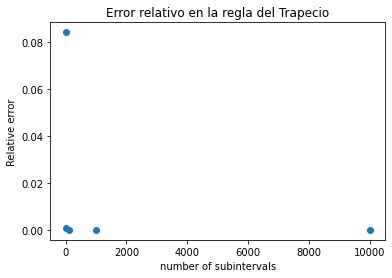

In [35]:
plt.plot(numb_of_subintervals, relative_errors,'o')
plt.xlabel('number of subintervals')
plt.ylabel('Relative error')
plt.title('Error relativo en la regla del Trapecio')
plt.show()

Si no nos interesa el valor de los errores relativos y sólo la gráfica podemos utilizar la siguiente opción:

In [36]:
from functools import partial

Ver [functools.partial](https://docs.python.org/2/library/functools.html#functools.partial) para documentación, [liga](https://stackoverflow.com/questions/15331726/how-does-functools-partial-do-what-it-does) para una explicación de `partial` y [liga2](https://stackoverflow.com/questions/10834960/how-to-do-multiple-arguments-to-map-function-where-one-remains-the-same-in-pytho), [liga3](https://stackoverflow.com/questions/47859209/how-to-map-over-a-function-with-multiple-arguments-in-python) para ejemplos de uso.

In [37]:
tcf_approx_2 = map(partial(Tcf,f=f,a=a,b=b),
                   numb_of_subintervals) #map returns an iterator

In [38]:
def compute_error_point_wise_2(obj, approx):
    for ap in approx:
        yield math.fabs(ap-obj)/math.fabs(obj) #using math library

```{admonition} Observación

La función `compute_error_point_wise_2` anterior es un [generator](https://wiki.python.org/moin/Generators), ver [liga](https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do) para conocer el uso de `yield`.
```

In [39]:
relative_errors_2 = compute_error_point_wise_2(obj, tcf_approx_2)

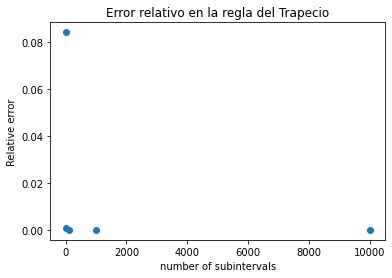

In [40]:
plt.plot(numb_of_subintervals,list(relative_errors_2),'o')
plt.xlabel('number of subintervals')
plt.ylabel('Relative error')
plt.title('Error relativo en la regla del Trapecio')
plt.show()

**Otra forma con [scatter](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.scatter.html):**

In [41]:
tcf_approx_2 = map(partial(Tcf,f=f,a=a,b=b),
                   numb_of_subintervals) #map returns an iterator

In [42]:
relative_errors_2 = compute_error_point_wise_2(obj, tcf_approx_2)

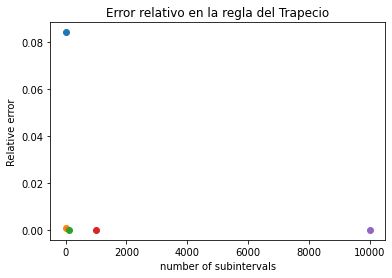

In [43]:
[plt.scatter(n,rel_err) for n,rel_err in zip(numb_of_subintervals,relative_errors_2)]
plt.xlabel('number of subintervals')
plt.ylabel('Relative error')
plt.title('Error relativo en la regla del Trapecio')
plt.show()

## Regla compuesta de Simpson

En cada subintervalo se aplica la regla simple $Sf$, esto es:

$$\displaystyle \int_{a_{i-1}}^{a_i}f(x)dx \approx S_i(f) \forall i=1,\dots,n$$

con $S_i(f) = \frac{h}{6}\left[f(x_{2i}+f(x_{2i-2})+4f(x_{2i-1})\right]$ para el subintervalo $[a_{i-1},a_i]$ con $i=1,\dots,n$.

De forma sencilla se puede ver que la regla compuesta de Simpson compuesta $S_c(f)$ se escribe como:

$$S_c(f) = \displaystyle \frac{h}{3(2n)} \left [ f(x_0) + f(x_{2n}) + 2 \sum_{i=1}^{n-1}f(x_{2i}) + 4 \sum_{i=1}^{n}f(x_{2i-1})\right ] $$

con $h=b-a$ y $n$ número de subintervalos.

<img src="https://dl.dropboxusercontent.com/s/8rx32vdtulpdflm/Simpson_compuesto.png?dl=0" heigth="200" width="200">


```{admonition} Observación
:class: tip

Los nodos para el caso de Simpson se obtienen con la fórmula: $x_i = a +\frac{i}{2}\hat{h}, \forall i=0,\dots,2n, \hat{h}=\frac{h}{n}$.
```

```{margin}

En esta [liga](https://www.dropbox.com/s/qrbcs5n57kp5150/Simpson-6-subintervalos.pdf?dl=0) está un apoyo visual para la regla Scf.
```

```{admonition} Ejercicio
:class: tip

Implementar la regla compuesta de Simpson para aproximar la integral $\int_0^1e^{-x^2}dx$. Calcular error relativo y realizar una gráfica de $n$ vs Error relativo para $n=1,10,100,1000,10000$ utilizando numpy e iterators.
```

## Expresiones de los errores para las reglas compuestas del rectángulo, trapecio y Simpson

La forma de los errores de las reglas del rectángulo, trapecio y Simpson se pueden obtener con interpolación o con el teorema de Taylor. Ver [Diferenciación e Integración](https://www.dropbox.com/s/jfrxanjls8kndjp/Diferenciacion_e_Integracion.pdf?dl=0) para detalles y {ref}`Polinomios de Taylor y diferenciación numérica <PTDN>` para el teorema. Suponiendo que $f$ cumple con condiciones sobre sus derivadas, tales errores son:


$$\text{Err}Rc(f) = \frac{b-a}{6}f^{(2)}(\xi_r)\hat{h}^2, \xi_r \in [a,b]$$

$$\text{Err}Tc(f)=-\frac{b-a}{12}f^{(2)}(\xi_t)\hat{h}^2, \xi_t \in [a,b]$$

$$\text{Err}Sc(f)=-\frac{b-a}{180}f^{(4)}(\xi_S)\hat{h}^4, \xi_S \in [a,b].$$

(IMC)=

## Integración por el método de Monte Carlo

Los métodos de integración numérica por Monte Carlo son similares a los métodos por cuadratura en el sentido que se eligen puntos en los que se evaluará el integrando para sumar sus valores. La diferencia esencial con los métodos por cuadratura es que en el método de integración por Monte Carlo los puntos son **seleccionados de una forma *aleatoria*** (de hecho es pseudo-aleatoria pues se generan con un programa de computadora) en lugar de generarse con una fórmula.

### Problema

Aproximar numéricamente la integral $\displaystyle \int_{\Omega}f(x)dx$ para $x \in \mathbb{R}^N, \Omega \subseteq \mathbb{R}^N, f: \mathbb{R}^N \rightarrow \mathbb{R}$ función tal que la integral esté bien definida en $\Omega$.

Por ejemplo para $N=2:$

<img src="https://dl.dropboxusercontent.com/s/xktwjmgbf8aiekw/integral_2_dimensiones.png?dl=0" heigth="500" width="500">


Para resolver el problema anterior con $\Omega$ un rectángulo, podemos utilizar las reglas por cuadratura por Newton-Cotes o cuadratura Gaussiana en una dimensión manteniendo fija la otra dimensión. Sin embargo considérese la siguiente situación:

La regla del rectángulo (o del punto medio) y del trapecio tienen un error de orden $\mathcal{O}(h^2)$ independientemente de si se está aproximando integrales de una o más dimensiones. Supóngase que se utilizan $n$ nodos para tener un valor de espaciado igual a $h$, entonces para $d$ dimensiones se requerirían $N=n^d$ evaluaciones del integrando, o bien, si se tiene un valor de $N$ igual a $10, 000$ y $N=4$ dimensiones el error sería del orden $\mathcal{O}(N^{-2/d})$ lo que implicaría un valor de $h=.1$ para aproximadamente sólo **dos dígitos** correctos en la aproximación (para el enunciado anterior recuérdese que $h$ es proporcional a $n^{-1}$ y $n$ = $N^{1/d}$). Este esfuerzo enorme de evaluar $N$ veces el integrando para una exactitud pequeña se debe al problema de generar puntos para *llenar* un espacio $d$-dimensional y se conoce con el nombre de la maldición de la dimensionalidad, **the curse of dimensionality**.

Una opción para resolver la situación anterior si no se desea una exactitud grande (por ejemplo con una precisión de $10^{-4}$ o $4$ dígitos es suficiente) es con el método de integración por Monte Carlo (tal nombre por el uso de números aleatorios). La integración por el método de Monte Carlo está basada en la interpretación geométrica de las integrales: calcular la integral del problema inicial implica calcular el **hipervolumen** de $\Omega$.

### Ejemplo



Supóngase que se desea aproximar el área de un círculo centrado en el origen de radio igual a $1$:

<img src="https://dl.dropboxusercontent.com/s/xmtcxw3wntfxuau/monte_carlo_1.png?dl=0" heigth="300" width="300">


entonces el área de este círculo es $\pi r^2 = \pi$.

Para lo anterior **encerramos** al círculo con un cuadrado de lado $2$:

<img src="https://dl.dropboxusercontent.com/s/igsn57vuahem0il/monte_carlo_2.png?dl=0" heigth="200" width="200">

Si tenemos $n$ puntos en el cuadrado:

<img src="https://dl.dropboxusercontent.com/s/a4krdneo0jaerqz/monte_carlo_3.png?dl=0" heigth="200" width="200">


y consideramos los $m$ puntos que están dentro del círculo:

<img src="https://dl.dropboxusercontent.com/s/pr4c5e57r4fawdt/monte_carlo_4.png?dl=0" heigth="200" width="200">

Entonces: $\frac{\text{Área del círculo}}{\text{Área del cuadrado}} \approx \frac{m}{n}$ y se tiene: Área del círculo $\approx$Área del cuadrado$\frac{m}{n}$ y si $n$ crece entonces la aproximación es mejor.

prueba numérica:

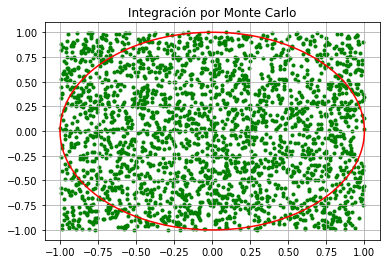

In [44]:
density_p=int(2.5*10**3)
x_p=np.random.uniform(-1,1,(density_p,2))
plt.scatter(x_p[:,0],x_p[:,1],marker='.',color='g')
density=1e-5
x=np.arange(-1,1,density)
y1=np.sqrt(1-x**2)
y2=-np.sqrt(1-x**2)
plt.plot(x,y1,'r',x,y2,'r')
plt.title('Integración por Monte Carlo')
plt.grid()
plt.show()

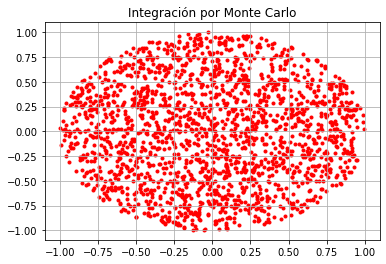

In [45]:
f=lambda x: np.sqrt(x[:,0]**2 + x[:,1]**2) #norm2 definition
ind=f(x_p)<=1
x_p_subset=x_p[ind]
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.',color='r')
plt.title('Integración por Monte Carlo')
plt.grid()
plt.show()

Área del círculo es aproximadamente:

In [46]:
square_area = 4
square_area*len(x_p_subset)/len(x_p)

3.1232

Si aumentamos el número de puntos...

In [47]:
density_p=int(10**4)
x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]
square_area*len(x_p_subset)/len(x_p)

3.1368

In [48]:
density_p=int(10**5)
x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]
square_area*len(x_p_subset)/len(x_p)

3.13936

```{admonition} Comentarios

* El método de Monte Carlo revisado en el ejemplo anterior nos indica que debemos encerrar a la región de integración $\Omega$. Por ejemplo para una región $\Omega$ más general:

<img src="https://dl.dropboxusercontent.com/s/ke6hngwue3ovpaz/monte_carlo_5.png?dl=0" heigth="300" width="300">

entonces la integración por el método de Monte Carlo será:

$$\displaystyle \int_\Omega f d\Omega \approx V \overline{f}$$

donde: $V$ es el hipervolumen de $\Omega_E$ que encierra a $\Omega$, esto es $\Omega \subseteq \Omega_E$, $\{x_1,\dots,x_n\}$ es un conjunto de puntos distribuidos uniformemente en $\Omega_E$ y $\overline{f}=\frac{1}{n}\displaystyle \sum_{i=1}^nf(x_i)$

* Consideramos $\overline{f}$ pues $\displaystyle \sum_{i=1}^nf(x_i)$ representa el valor de $m$ si pensamos a $f$ como una restricción que deben cumplir los $n$ puntos en el ejemplo de aproximación al área del círculo: Área del círculo $\approx$Área del cuadrado$\frac{m}{n}$ (en este caso Área del cuadrado es el hipervolumen $V$).

* Algunas características para regiones que encierren a $\Omega$ es que:

    * Sea sencillo generar números aleatorios uniformes.
    * Sea sencillo obtener su hipervolumen.

```

### Ejemplos

**Aproximar las siguientes integrales:**

In [49]:
density_p=int(10**4)

* $\displaystyle \int_0^1\frac{4}{1+x^2}dx = \pi$

In [50]:
f = lambda x: 4/(1+x**2)
x_p = np.random.uniform(0,1,density_p)
obj = math.pi
a = 0
b = 1
vol = b-a
ex_1 = vol*np.mean(f(x_p))
"error relativo: {:0.4e}".format(compute_error(obj, ex_1))

'error relativo: 7.1131e-04'

* $\displaystyle \int_1^2 \frac{1}{x}dx = \log{2}$.

In [51]:
f = lambda x: 1/x
x_p = np.random.uniform(1,2,density_p)
obj = math.log(2)
a = 1
b = 2
vol = b-a
ex_2 = vol*np.mean(f(x_p))
"error relativo: {:0.4e}".format(compute_error(obj, ex_2))

'error relativo: 1.3364e-04'

* $\displaystyle \int_{-1}^1 \int_0^1x^2+y^2dxdy = \frac{4}{3}$. 

In [52]:
f = lambda x,y:x**2+y**2
a1 = -1
b1 = 1
a2 = 0
b2 = 1
x_p = np.random.uniform(a1,b1,density_p)
y_p = np.random.uniform(a2,b2,density_p)
obj = 4/3
vol = (b1-a1)*(b2-a2)
ex_3 = vol*np.mean(f(x_p,y_p))
"error relativo: {:0.4e}".format(compute_error(obj, ex_3))

'error relativo: 2.0586e-03'

* $\displaystyle \int_0^{\frac{\pi}{2}} \int_0^{\frac{\pi}{2}}\cos(x)\sin(y)dxdy=1$.

In [53]:
f = lambda x,y:np.cos(x)*np.sin(y)
a1 = 0
b1 = math.pi/2
a2 = 0
b2 = math.pi/2
x_p = np.random.uniform(a1,b1,density_p)
y_p = np.random.uniform(a2,b2,density_p)
obj = 1
vol = (b1-a1)*(b2-a2)
ex_4 = vol*np.mean(f(x_p,y_p))
"error relativo: {:0.4e}".format(compute_error(obj, ex_4))

'error relativo: 9.9073e-03'

* $\displaystyle \int_0^1\int_{\frac{-1}{2}}^0\int_0^{\frac{1}{3}}(x+2y+3z)^2dxdydz =\frac{1}{12}$.

In [54]:
f = lambda x,y,z:(x+2*y+3*z)**2
a1 = 0
b1 = 1
a2 = -1/2
b2 = 0
a3 = 0
b3 = 1/3
x_p = np.random.uniform(a1,b1,density_p)
y_p = np.random.uniform(a2,b2,density_p)
z_p = np.random.uniform(a3,b3,density_p)
obj = 1/12
vol = (b1-a1)*(b2-a2)*(b3-a3)
ex_5 = vol*np.mean(f(x_p,y_p,z_p))
"error relativo: {:0.4e}".format(compute_error(obj, ex_5))

'error relativo: 3.3180e-03'

### Cuál es el error en la aproximación por el método de integración por Monte Carlo?

Para obtener la expresión del error en esta aproximación supóngase que $x_1, x_2,\dots x_n$ son variables aleatorias independientes uniformemente distribuidas. Entonces:

$$\text{Err}(\overline{f})=\sqrt{\text{Var}(\overline{f})}=\sqrt{\text{Var}\left( \frac{1}{n} \displaystyle \sum_{i=1}^nf(x_i)\right)}=\dots=\sqrt{\frac{\text{Var}(f(x))}{n}}$$

con $x$ variable aleatoria uniformemente distribuida.

Un estimador de $\text{Var}(f(x))$ es: $\frac{1}{n}\displaystyle \sum_{i=1}^n(f(x_i)-\overline{f})^2=\overline{f^2}-\overline{f}^2$ por lo que $\hat{\text{Err}}(\overline{f}) = \sqrt{\frac{\overline{f^2}-\overline{f}^2}{n}}$.

Se tiene entonces: 

$$\displaystyle \int_\Omega f d\Omega \approx V(\overline{f} \pm \text{Err}(\overline{f})) \approx V(\overline{f} \pm \hat{\text{Err}}(\overline{f}))=V\overline{f} \pm V\sqrt{\frac{\overline{f^2}-\overline{f}^2}{n}}$$

```{admonition} Comentarios

* Los signos $\pm$ en el error de aproximación **no** representan una cota rigurosa, es una desviación estándar.

* A diferencia de la aproximación por las reglas por cuadratura tenemos una precisión con $n$ puntos independientemente de la dimensión $N$.

* Si $N \rightarrow \infty$ entonces $\hat{\text{Err}}(\overline{f}) = \mathcal{O}\left(\frac{1}{\sqrt{n}} \right)$ por lo que para ganar un decimal extra de precisión en la integración por el método de Monte Carlo se requiere incrementar el número de puntos por un factor de $10^2$.
```

```{admonition} Observación
:class: tip

Obsérvese que si $f$ es constante entonces $\hat{\text{Err}}(\overline{f})=0$. Esto implica que si $f$ es casi constante y $\Omega_E$ encierra muy bien a $\Omega$ entonces se tendrá una estimación muy precisa de $\displaystyle \int_\Omega f d\Omega$, por esto en la integración por el método de Monte Carlo se realizan cambios de variable de modo que transformen a $f$ en aproximadamente constante y que esto resulte además en regiones $\Omega_E$ que encierren a $\Omega$ casi de manera exacta (y que además sea sencillo generar números pseudo aleatorios en ellas!).
```

### Ejemplo

Para el ejemplo anterior $\displaystyle \int_0^1\frac{4}{1+x^2}dx = \pi$ se tiene:

In [55]:
f = lambda x: 4/(1+x**2)
x_p = np.random.uniform(0,1,density_p)
obj = math.pi
a = 0
b = 1
vol = b-a
f_bar = np.mean(f(x_p))
ex_6 = vol*f_bar
"error relativo: {:0.4e}".format(compute_error(obj,ex_6 ))

'error relativo: 6.5713e-04'

In [56]:
est_error = math.sqrt(sum((f(x_p)-f_bar)**2)/density_p**2)

In [57]:
est_error

0.006395078176745551

intervalo:

In [58]:
(ex_6-vol*est_error, ex_6+vol*est_error)

(3.1331331454147056, 3.1459233017681965)

```{admonition} Ejercicios
:class: tip

Aproximar, reportar errores relativos e intervalo de estimación en una tabla:

* $\displaystyle \int_0^1\int_0^1\sqrt{x+y}dydx=\frac{2}{3}\left(\frac{2}{5}2^{5/2}-\frac{4}{5}\right)$.

* $\displaystyle \int_D \int \sqrt{x+y}dydx=8\frac{\sqrt{2}}{15}$ donde: $D=\{(x,y) \in \mathbb{R}^2 | 0 \leq x \leq 1, -x \leq y \leq x\}$.

* $\displaystyle \int_D \int \exp{(x^2+y^2)}dydx = \pi(e^9-1)$ donde $D=\{(x,y) \in \mathbb{R}^2 | x^2+y^2 \leq 9\}$.

* $\displaystyle \int_0^2 \int_{-1}^1 \int_0^1 (2x+3y+z)dzdydx = 10$.
```

### Aproximación de características de variables aleatorias

La integración por el método de Monte Carlo se utiliza para aproximar características de variables aleatorias continuas. Por ejemplo, si $x$ es variable aleatoria continua, entonces su media está dada por:

$$E_f[h(X)] = \displaystyle \int_{S_X}h(x)f(x)dx$$

donde: $f$ es función de densidad de $X$, $S_X$ es el soporte de $X$ y $h$ es una transformación. Entonces:

$$E_f[h(X)] \approx \frac{1}{n} \displaystyle \sum_{i=1}^nh(x_i)=\overline{h}_n$$

con $\{x_1,x_2,\dots,x_n\}$ muestra de $f$. Y por la ley de los grandes números se tiene:

$$\overline{h}_n \xrightarrow{n \rightarrow \infty} E_f[h(X)]$$ 

con **convergencia casi segura**. Aún más: si $E_f[h^2(X)] < \infty$ entonces el error de aproximación  de $\overline{h}_n$ es del orden $\mathcal{O}\left(\frac{1}{\sqrt{n}} \right)$ y una estimación de este error es: $\hat{\text{Err}}(\overline{h}) = \sqrt{\frac{\overline{h^2}-\overline{h}^2}{n}}$. Por el teorema del límite central:

$$\frac{\overline{h}_n-E_f[h(X)]}{\hat{\text{Err}}(\overline{h})} \xrightarrow{n \rightarrow \infty} N(0,1)$$

con $N(0,1)$ una distribución Normal con $\mu=0,\sigma=1$ $\therefore$ si $n \rightarrow \infty$ un intervalo de confianza al $95\%$ para $E_f[h(X)]$ es: $(\overline{h}_n \pm z_{.975} \hat{\text{Err}}(\overline{h}))$.


Uno de los pasos complicados en el desarrollo anterior es obtener una muestra de $f$ que para el caso de variables continuas se puede utilizar el teorema de transformación inversa o integral de probabilidad.


```{admonition} Ejercicios
:class: tip

1. Resuelve los ejercicios y preguntas de la nota.


**Referencias**

1. R. L. Burden, J. D. Faires, Numerical Analysis, Brooks/Cole Cengage Learning, 2005.

2. M. T. Heath, Scientific Computing. An Introductory Survey, McGraw-Hill, 2002.

3. Nota {ref}`Sistema de punto flotante <SPF>`.

4. Nota {ref}`Definición de función, continuidad y derivada <FCD>`.

5. Nota {ref}`Polinomios de Taylor y diferenciación numérica <PTDN>`.

6. Nota {ref}`Condición de un problema y estabilidad de un algoritmo <CPEA>`.
